# 2. Photometric redshifts of galaxies

1b) The early work on photometric redshifts was done using linear regression. Design a regression estimator using either ridge, LASSO or linear regression to predict photometric redshifts, make sure to justify all the choises you make. Use the whole of file A for training and aim to obtain E($\theta$) < 0.01 as training error

In [61]:
import numpy as np
import matplotlib.pyplot as plt 
from astropy.io.votable import parse_single_table
from astroML.linear_model import LinearRegression
form sklearn.linear_model import Ridge, Lasso

%matplotlib inline

SyntaxError: invalid syntax (<ipython-input-61-6407ea34d703>, line 5)

In [11]:
# Read the document

root = "/home/esmee/Documents/DBDM/DDM2017-master/FinalProject/"
tableA = parse_single_table(root + "PhotoZFileA.vot")

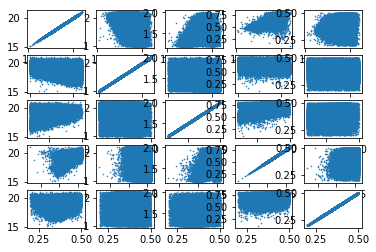

In [22]:
colnames = ['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']

fig, ax = plt.subplots(5,5)

for i, c1 in enumerate(colnames):
    for j,c2 in enumerate(colnames):
        ax[i,j].scatter(tableA.array[c1], tableA.array[c2], s=0.3)

In [80]:
Xa = np.vstack([tableA.array['mag_r'], tableA.array['u-g'], tableA.array['g-r'], tableA.array['r-i'], tableA.array['i-z']]).T
ya = tableA.array['z_spec']

def predict( X, y, model = 'Linear', pred = True):
    if model == 'Linear':
        model = LinearRegression(fit_intercept=True)
    if model == 'Ridge':
        model = Ridge(fit_intercept=True)
    if model == 'Lasso':
        model = Lasso(alpha=0.005)
    
    res = model.fit(X, y)
    print "Coefficients found: ", res.coef_
    
    if pred:
        pred = res.predict(X)
        return res, pred
    else:
        return res

def E(y_pred, y):
    return np.median(np.abs( (y-y_pred) / (1+y)))

In [79]:
# Predict and find the discrepancy 
print "Linear Regression: \n", E(predict(Xa,ya, 'Linear')[1], ya)
print "Lasso: \n", E(predict(Xa,ya, 'Lasso')[1], ya)
print "Ridge: \n", E(predict(Xa,ya, 'Ridge')[1], ya)

Linear Regression: 
Coefficients found:  [-0.78343182  0.03980657 -0.01269732  0.08332845  0.41577275  0.02118495]
0.0145588611233
Lasso: 
Coefficients found:  [ 0.08025918 -0.          0.          0.          0.        ]
0.0220859490652
Ridge: 
Coefficients found:  [ 0.03996557 -0.01270716  0.08337191  0.41373152  0.02150367]
0.0145675874404


1c) Use file B to quantify the generalisation error of the estimator you derived in problem b.

In [84]:
# Read the document

tableB = parse_single_table(root + "PhotoZFileB.vot")
Xb = np.vstack([tableB.array['mag_r'], tableB.array['u-g'], tableB.array['g-r'], tableB.array['r-i'], tableB.array['i-z']]).T
yb = tableB.array['z_spec']



Coefficients found:  [-0.78343182  0.03980657 -0.01269732  0.08332845  0.41577275  0.02118495]
0.0146014572286


In [ ]:
# Predict the training data
res = predict(Xa,ya, 'Linear', pred=False)
print E(res.predict(Xb), yb)